In [24]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_parquet("data/train.parquet")

In [7]:
new_data = pd.read_parquet("data/test.parquet")

In [8]:
all_new_predictions = pd.DataFrame()

In [9]:
most_common_counter_name = df["counter_name"].value_counts().idxmax()

In [11]:
selected_counter_data = df[df["counter_name"] == most_common_counter_name][
    ["date", "log_bike_count"]
].rename(columns={"date": "ds", "log_bike_count": "y"})

In [13]:
model = Prophet()

In [14]:
model.fit(selected_counter_data)

23:32:45 - cmdstanpy - INFO - Chain [1] start processing
23:32:47 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future = model.make_future_dataframe(periods=365)

In [16]:
forecast = model.predict(future)

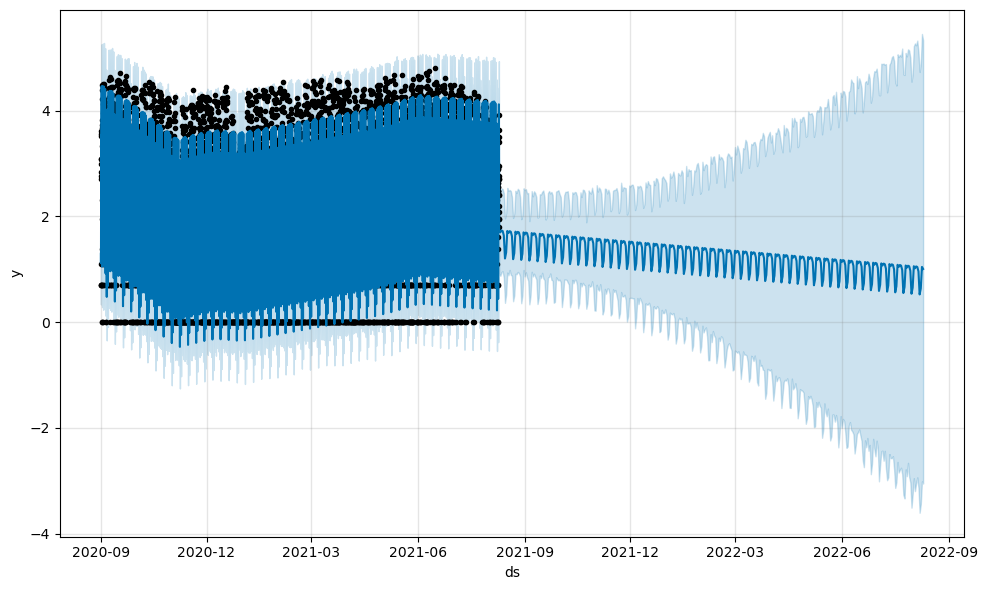

In [19]:
predictions = forecast[["ds", "yhat"]]
fig = model.plot(forecast)
plt.show()

23:35:15 - cmdstanpy - INFO - Chain [1] start processing
23:35:16 - cmdstanpy - INFO - Chain [1] done processing


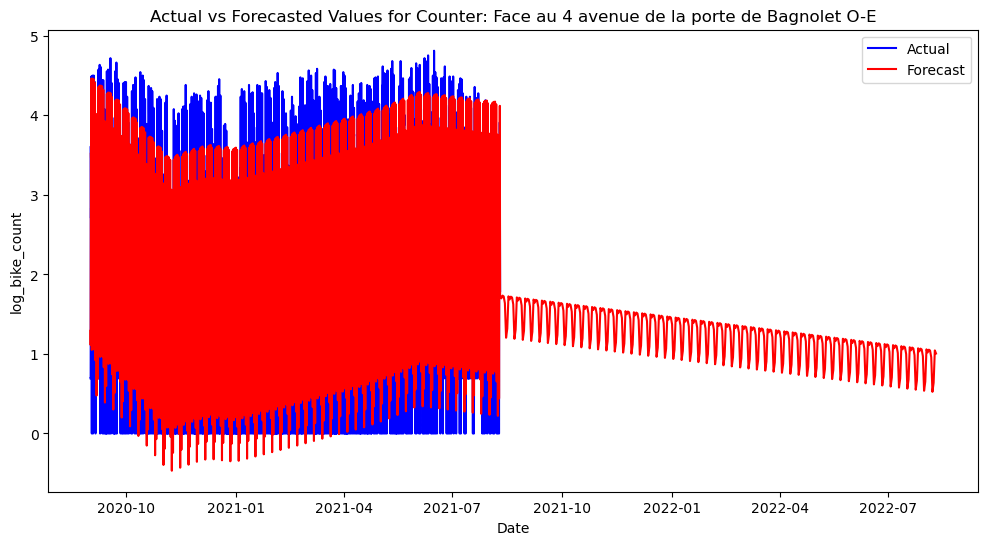

In [21]:
most_common_counter_name = df["counter_name"].value_counts().idxmax()

# Filter the DataFrame for the selected counter_name
selected_counter_data = df[df["counter_name"] == most_common_counter_name][
    ["date", "log_bike_count"]
].rename(columns={"date": "ds", "log_bike_count": "y"})

selected_counter_data = selected_counter_data.sort_values(by="ds")

# Create and fit the model
model = Prophet()
model.fit(selected_counter_data)

# Make future DataFrame for predictions
future = model.make_future_dataframe(
    periods=365
)  # You can adjust the number of periods as needed

# Make predictions
forecast = model.predict(future)

# Extract relevant columns
predictions = forecast[["ds", "yhat"]]

# Plot actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(
    selected_counter_data["ds"],
    selected_counter_data["y"],
    label="Actual",
    color="blue",
)
plt.plot(predictions["ds"], predictions["yhat"], label="Forecast", color="red")
plt.title(f"Actual vs Forecasted Values for Counter: {most_common_counter_name}")
plt.xlabel("Date")
plt.ylabel("log_bike_count")
plt.legend()
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455163 entries, 48321 to 928462
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 455163 non-null  category      
 1   counter_name               455163 non-null  category      
 2   site_id                    455163 non-null  int64         
 3   site_name                  455163 non-null  category      
 4   bike_count                 455163 non-null  float64       
 5   date                       455163 non-null  datetime64[ns]
 6   counter_installation_date  455163 non-null  datetime64[ns]
 7   counter_technical_id       455163 non-null  category      
 8   latitude                   455163 non-null  float64       
 9   longitude                  455163 non-null  float64       
 10  log_bike_count             455163 non-null  float64       
dtypes: category(4), datetime64[ns](2), float64(4), i

In [23]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41608 entries, 56474 to 929187
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   counter_id                 41608 non-null  category      
 1   counter_name               41608 non-null  category      
 2   site_id                    41608 non-null  int64         
 3   site_name                  41608 non-null  category      
 4   bike_count                 41608 non-null  float64       
 5   date                       41608 non-null  datetime64[ns]
 6   counter_installation_date  41608 non-null  datetime64[ns]
 7   counter_technical_id       41608 non-null  category      
 8   latitude                   41608 non-null  float64       
 9   longitude                  41608 non-null  float64       
 10  log_bike_count             41608 non-null  float64       
dtypes: category(4), datetime64[ns](2), float64(4), int64(1)
memory

In [25]:
# 1. Train Prophet models for each counter in df
# Initialize an empty DataFrame to store all predictions for new_data
all_new_predictions = pd.DataFrame()

In [26]:
# Iterate through each unique counter
for counter_id in df["counter_id"].unique():
    # Filter data for the specific counter in df
    counter_data = df[df["counter_id"] == counter_id][
        ["date", "log_bike_count"]
    ].rename(columns={"date": "ds", "log_bike_count": "y"})

    # Create and fit the model
    model = Prophet()
    model.fit(counter_data)

    # Filter new_data for the specific counter
    new_counter_data = new_data[new_data["counter_id"] == counter_id][
        ["date", "log_bike_count"]
    ].rename(columns={"date": "ds", "log_bike_count": "y"})

    # Make predictions for new_data
    new_forecast = model.predict(new_counter_data)

    # Extract relevant columns
    new_predictions = new_forecast[["ds", "yhat"]]
    new_predictions[
        "counter_id"
    ] = counter_id  # Add counter_id column to identify predictions for each counter

    # Append predictions to the overall DataFrame
    all_new_predictions = pd.concat(
        [all_new_predictions, new_predictions], ignore_index=True
    )

23:38:35 - cmdstanpy - INFO - Chain [1] start processing
23:38:36 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ameya\AppData\Local\Temp\ipykernel_26184\3541477738.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_predictions[
23:38:36 - cmdstanpy - INFO - Chain [1] start processing
23:38:38 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ameya\AppData\Local\Temp\ipykernel_26184\3541477738.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_predictions[
23:38:38 - cmdstanpy - I

In [30]:
# 2. Calculate RMSE for the predictions
# Merge actual log_bike_count values from new_data with the predictions
merged_data = pd.merge(
    new_data,
    all_new_predictions,
    left_on=["counter_id", "date"],
    right_on=["counter_id", "ds"],
    how="left",
)

# Print merged_data to check the merged DataFrame
# print("Merged Data:")
# print(merged_data.head())

# Drop rows with NaN values in yhat (predictions)
merged_data = merged_data.dropna(subset=["yhat"])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(
    merged_data["log_bike_count"], merged_data["yhat"]))

# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.6486437177010418


In [31]:
unknown_data = pd.read_parquet("data/final_test.parquet")

In [32]:
unknown_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51440 entries, 0 to 51439
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   counter_id                 51440 non-null  category      
 1   counter_name               51440 non-null  category      
 2   site_id                    51440 non-null  int64         
 3   site_name                  51440 non-null  category      
 4   date                       51440 non-null  datetime64[ns]
 5   counter_installation_date  51440 non-null  datetime64[ns]
 6   coordinates                51440 non-null  category      
 7   counter_technical_id       51440 non-null  category      
 8   latitude                   51440 non-null  float64       
 9   longitude                  51440 non-null  float64       
dtypes: category(5), datetime64[ns](2), float64(2), int64(1)
memory usage: 2.2 MB


In [33]:
combined_data = pd.concat(
    [
        df[["date", "log_bike_count", "counter_id"]],
        new_data[["date", "log_bike_count", "counter_id"]],
    ],
    ignore_index=True,
)

In [34]:
unknown_data.head()

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude
0,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 01:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
1,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 13:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
2,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 17:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
3,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 19:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
4,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 22:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429


In [43]:
prophet_models = []

In [41]:
combined_data = combined_data.rename(
    columns={"date": "ds", "log_bike_count": "y"})

In [42]:
combined_data.head()

,ds,y,counter_id
0,2020-09-01 02:00:00,0.000000,100007049-102007049
1,2020-09-01 03:00:00,0.693147,100007049-102007049
2,2020-09-01 04:00:00,0.000000,100007049-102007049
3,2020-09-01 15:00:00,1.609438,100007049-102007049
4,2020-09-01 18:00:00,2.302585,100007049-102007049


In [44]:
all_unknown_predictions = pd.DataFrame()

In [45]:
# Iterate through each unique counter_id
for counter_id in combined_data["counter_id"].unique():
    # Filter data for the specific counter_id
    counter_data = combined_data[combined_data["counter_id"] == counter_id][["ds", "y"]]

    # Initialize Prophet model
    model = Prophet()

    # Fit the model with counter-specific data
    model.fit(counter_data)

    # Filter unknown_data for the specific counter_id
    unknown_counter_data = unknown_data[unknown_data["counter_id"] == counter_id][
        ["date"]
    ].rename(columns={"date": "ds"})

    # Make predictions for unknown_data
    unknown_forecast = model.predict(unknown_counter_data)

    # Extract relevant columns
    unknown_predictions = unknown_forecast[["ds", "yhat"]]
    unknown_predictions[
        "counter_id"
    ] = counter_id  # Add counter_id column to identify predictions for each counter

    # Append predictions to the overall DataFrame
    all_unknown_predictions = pd.concat(
        [all_unknown_predictions, unknown_predictions], ignore_index=True
    )

    # Save the model to the list
    prophet_models.append((counter_id, model))

23:55:25 - cmdstanpy - INFO - Chain [1] start processing
23:55:27 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ameya\AppData\Local\Temp\ipykernel_26184\1281930864.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_predictions[
23:55:27 - cmdstanpy - INFO - Chain [1] start processing
23:55:29 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ameya\AppData\Local\Temp\ipykernel_26184\1281930864.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_predictions[
23:55:29 - cmdst

In [46]:
all_unknown_predictions = all_unknown_predictions.sort_values(
    by=["counter_id", "ds"]
).reset_index(drop=True)

In [47]:
unknown_data.head()

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude
0,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 01:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
1,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 13:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
2,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 17:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
3,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 19:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
4,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 22:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429


In [48]:
all_unknown_predictions.head()

,ds,yhat,counter_id
0,2021-09-10 01:00:00,1.382334,100007049-101007049
1,2021-09-10 02:00:00,1.132292,100007049-101007049
2,2021-09-10 03:00:00,1.314329,100007049-101007049
3,2021-09-10 04:00:00,1.960048,100007049-101007049
4,2021-09-10 05:00:00,2.831478,100007049-101007049


In [49]:
unknown_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51440 entries, 0 to 51439
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   counter_id                 51440 non-null  category      
 1   counter_name               51440 non-null  category      
 2   site_id                    51440 non-null  int64         
 3   site_name                  51440 non-null  category      
 4   date                       51440 non-null  datetime64[ns]
 5   counter_installation_date  51440 non-null  datetime64[ns]
 6   coordinates                51440 non-null  category      
 7   counter_technical_id       51440 non-null  category      
 8   latitude                   51440 non-null  float64       
 9   longitude                  51440 non-null  float64       
dtypes: category(5), datetime64[ns](2), float64(2), int64(1)
memory usage: 2.2 MB


In [50]:
all_unknown_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51440 entries, 0 to 51439
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          51440 non-null  datetime64[ns]
 1   yhat        51440 non-null  float64       
 2   counter_id  51440 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ MB


In [51]:
# Merge the 'yhat' column from all_unknown_predictions to unknown_data
merged_unknown_data = pd.merge(
    unknown_data,
    all_unknown_predictions[["ds", "yhat", "counter_id"]],
    left_on=["date", "counter_id"],
    right_on=["ds", "counter_id"],
    how="left",
)

# Drop the duplicate 'ds' column from the merge
merged_unknown_data = merged_unknown_data.drop(columns=["ds"])

# Print or use the merged_unknown_data DataFrame
print(merged_unknown_data.head())

            counter_id              counter_name    site_id  \
0  100007049-102007049  28 boulevard Diderot E-O  100007049   
1  100007049-102007049  28 boulevard Diderot E-O  100007049   
2  100007049-102007049  28 boulevard Diderot E-O  100007049   
3  100007049-102007049  28 boulevard Diderot E-O  100007049   
4  100007049-102007049  28 boulevard Diderot E-O  100007049   

              site_name                date counter_installation_date  \
0  28 boulevard Diderot 2021-09-10 01:00:00                2013-01-18   
1  28 boulevard Diderot 2021-09-10 13:00:00                2013-01-18   
2  28 boulevard Diderot 2021-09-10 17:00:00                2013-01-18   
3  28 boulevard Diderot 2021-09-10 19:00:00                2013-01-18   
4  28 boulevard Diderot 2021-09-10 22:00:00                2013-01-18   

          coordinates counter_technical_id   latitude  longitude      yhat  
0  48.846028,2.375429          Y2H15027244  48.846028   2.375429  0.262730  
1  48.846028,2.375429       

In [52]:
merged_unknown_data.head()

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,yhat
0,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 01:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.262730
1,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 13:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.417465
2,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 17:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.635565
3,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 19:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.950951
4,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 22:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.402696


In [53]:
unknown_data.head()

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude
0,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 01:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
1,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 13:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
2,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 17:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
3,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 19:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
4,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 22:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429


In [55]:
# Rename 'yhat' column to 'log_bike_count' before exporting
merged_unknown_data.rename(columns={"yhat": "log_bike_count"}, inplace=True)

# Export 'log_bike_count' column to predictions2.csv
merged_unknown_data[["log_bike_count"]].to_csv(
    "predictions2.csv", index=True, index_label="Id"
)